In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22415 sha256=b90b2ea3c5e8d167e35ea9bda0cdd535487545f4dfb4cbf7612baf48d27ea36c
  Stored in directory: c:\users\natha\appdata\local\pip\cache\wheels\28\79\3c\08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8374 sha256=acf778fb4965fd4d06da71c4f7ab90745dcbc7f8166cbf0cf7fe87c5fa239a42
  Stored in directory: c:\users\natha\appdata\local\pip\cache\wheels\ae\25\47\4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [16]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'SBUX'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1')

#see your data
tickerDf


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,9.84,9.85,9.67,9.73,16370000,0.0,0.0
2010-01-05,9.69,10.13,9.66,9.96,30058800,0.0,0.0
2010-01-06,9.91,9.97,9.82,9.89,14209600,0.0,0.0
2010-01-07,9.83,9.93,9.79,9.86,10256000,0.0,0.0
2010-01-08,9.79,9.96,9.79,9.83,10274800,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-15,74.30,77.91,74.08,76.96,14644700,0.0,0.0
2020-06-16,78.79,78.94,76.39,77.84,10890100,0.0,0.0
2020-06-17,78.07,78.29,76.68,77.10,6904200,0.0,0.0


In [17]:
df = tickerDf

In [18]:
del df['Dividends']

In [19]:
del df['Stock Splits']

In [20]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,9.84,9.85,9.67,9.73,16370000
2010-01-05,9.69,10.13,9.66,9.96,30058800
2010-01-06,9.91,9.97,9.82,9.89,14209600
2010-01-07,9.83,9.93,9.79,9.86,10256000
2010-01-08,9.79,9.96,9.79,9.83,10274800


In [21]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-15,74.30,77.91,74.08,76.96,14644700
2020-06-16,78.79,78.94,76.39,77.84,10890100
2020-06-17,78.07,78.29,76.68,77.10,6904200
2020-06-18,76.72,76.79,75.80,76.31,8484200
2020-06-19,77.03,77.38,74.89,75.40,11276845


In [23]:
series = df['Close'].values.reshape(-1,1)

In [24]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [26]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T,1) # N x T x D
Y = np.array(Y)
N = len(X)
X.shape

(2624, 10, 1)

In [28]:
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss = 'mse', optimizer=Adam(lr=0.1))

r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs = 80,
    validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
41/41 [==============================] - 2s 45ms/step - loss: 0.0431 - val_loss: 2.9534
Epoch 2/80
41/41 [==============================] - 0s 12ms/step - loss: 0.0032 - val_loss: 2.6499
Epoch 3/80
41/41 [==============================] - 1s 13ms/step - loss: 0.0020 - val_loss: 2.4631
Epoch 4/80
41/41 [==============================] - 1s 13ms/step - loss: 0.0031 - val_loss: 2.5709
Epoch 5/80
41/41 [==============================] - 1s 12ms/step - loss: 0.0022 - val_loss: 2.6117
Epoch 6/80
41/41 [==============================] - 1s 13ms/step - loss: 0.0019 - val_loss: 2.5181
Epoch 7/80
41/41 [==============================] - 1s 17ms/step - loss: 0.0021 - val_loss: 2.5947
Epoch 8/80
41/41 [==============================] - 1s 17ms/step - loss: 0.0020 - val_loss: 2.4486
Epoch 9/80
41/41 [==============================] - 1s 17ms/step - loss: 0.0021 - val_loss: 2.4441
Epoch 10/80
41/41 [==============================] - 1s 16ms/step - loss: 0.0022 - val_loss: 2.3454
Epoch 11/

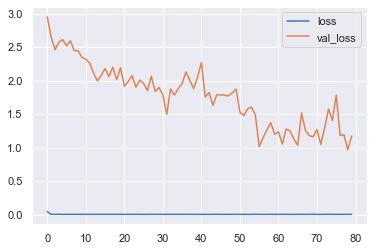

In [31]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()


(2624, 1)


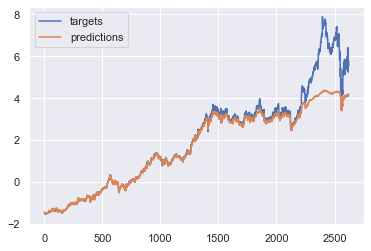

In [32]:
# One-step Forecast

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label = 'predictions')
plt.legend()

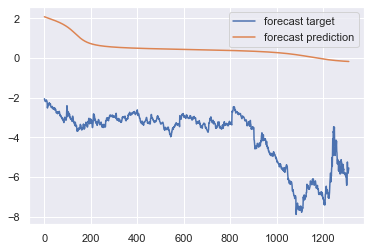

In [33]:
# Multi-step Forecast
validation_target = -Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

plt.plot(validation_target,label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [34]:
df['PrevClose'] = df['Close'].shift(1)

In [45]:
df['Return'] = (df['Close']-df['PrevClose'])/df['PrevClose']

In [46]:
df.head()

,Open,High,Low,Close,Volume,PrevClose,Return
Date,,,,,,,
2010-01-04,9.84,9.85,9.67,9.73,16370000,NaN,NaN
2010-01-05,9.69,10.13,9.66,9.96,30058800,9.73,0.023638
2010-01-06,9.91,9.97,9.82,9.89,14209600,9.96,-0.007028
2010-01-07,9.83,9.93,9.79,9.86,10256000,9.89,-0.003033
2010-01-08,9.79,9.96,9.79,9.83,10274800,9.86,-0.003043


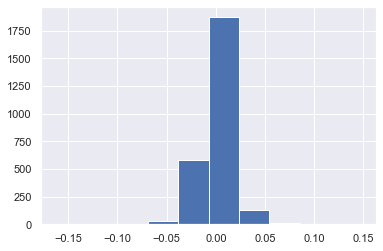

In [47]:
df['Return'].hist()

In [48]:
series = df['Return'].values[1:].reshape(-1,1)

scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()


In [49]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T,1) # N x T x D
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(2623, 10, 1) (2623,)


In [50]:
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i,x)
model.compile(loss = 'mse', optimizer=Adam(lr=0.1))

r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs = 80,
    validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80
41/41 [==============================] - 3s 77ms/step - loss: 1.0190 - val_loss: 1.0874
Epoch 2/80
41/41 [==============================] - 1s 31ms/step - loss: 1.0182 - val_loss: 1.0733
Epoch 3/80
41/41 [==============================] - 1s 29ms/step - loss: 1.0124 - val_loss: 1.0669
Epoch 4/80
41/41 [==============================] - 1s 30ms/step - loss: 0.9998 - val_loss: 1.0879
Epoch 5/80
41/41 [==============================] - 1s 27ms/step - loss: 1.0106 - val_loss: 1.0423
Epoch 6/80
41/41 [==============================] - 1s 22ms/step - loss: 1.0105 - val_loss: 1.0703
Epoch 7/80
41/41 [==============================] - 1s 22ms/step - loss: 1.0037 - val_loss: 1.0488
Epoch 8/80
41/41 [==============================] - 1s 22ms/step - loss: 0.9959 - val_loss: 1.0477
Epoch 9/80
41/41 [==============================] - 1s 24ms/step - loss: 0.9971 - val_loss: 1.0218
Epoch 10/80
41/41 [==============================] - 1s 24ms/step - loss: 0.9958 - val_loss: 1.0404
Epoch 11/

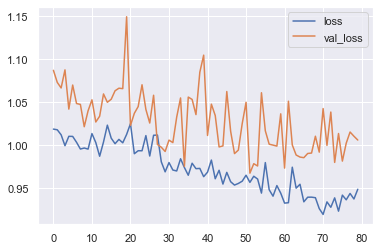

In [51]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(2623, 1)


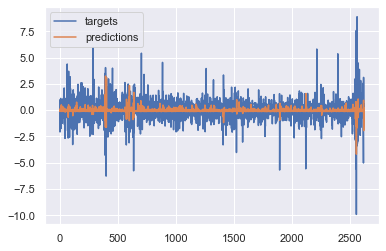

In [52]:
# One-step Forecast

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label = 'predictions')
plt.legend()

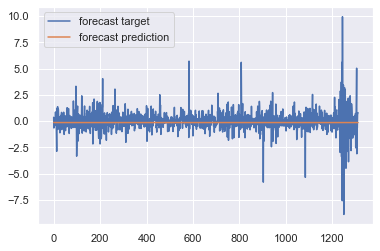

In [53]:
# Multi-step Forecast
validation_target = -Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0]
    
    validation_predictions.append(p)
    
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

plt.plot(validation_target,label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [55]:
input_data = df[['Open','High','Low','Close','Volume']].values
targets = df['Return'].values

In [57]:
T = 10 # No. ofTimestep to look at
D = input_data.shape[1]
N = len(input_data) - T

In [58]:
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [60]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
    X_train[t, :, :] = input_data[t:t+T]
    Y_train[t] = (targets[t+T]>0)

In [61]:
X_test = np.zeros((N - Ntrain, T ,D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
    t = u + Ntrain
    X_test[u, :, :] = input_data[t:t+T]
    Y_test[u] = (targets[t+T] > 0)

In [63]:
i = Input(shape=(T,D))
x = LSTM(50)(i)
x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy'])

In [64]:
r = model.fit(X_train, Y_train,
              batch_size=32, epochs =300,
             validation_data=(X_test,Y_test))

Epoch 1/300
55/55 [==============================] - 3s 55ms/step - loss: 0.6975 - accuracy: 0.5137 - val_loss: 0.7044 - val_accuracy: 0.4666
Epoch 2/300
55/55 [==============================] - 2s 27ms/step - loss: 0.6947 - accuracy: 0.5131 - val_loss: 0.7002 - val_accuracy: 0.4677
Epoch 3/300
55/55 [==============================] - 1s 23ms/step - loss: 0.6934 - accuracy: 0.5171 - val_loss: 0.7066 - val_accuracy: 0.4666
Epoch 4/300
55/55 [==============================] - 1s 26ms/step - loss: 0.6927 - accuracy: 0.5251 - val_loss: 0.6964 - val_accuracy: 0.5161
Epoch 5/300
55/55 [==============================] - 1s 25ms/step - loss: 0.6923 - accuracy: 0.5279 - val_loss: 0.7013 - val_accuracy: 0.5196
Epoch 6/300
55/55 [==============================] - 1s 24ms/step - loss: 0.6934 - accuracy: 0.5120 - val_loss: 0.7023 - val_accuracy: 0.5058
Epoch 7/300
55/55 [==============================] - 2s 27ms/step - loss: 0.6930 - accuracy: 0.5222 - val_loss: 0.7080 - val_accuracy: 0.4804
Epoch 

55/55 [==============================] - 1s 17ms/step - loss: 0.6711 - accuracy: 0.5945 - val_loss: 0.8240 - val_accuracy: 0.5035
Epoch 59/300
55/55 [==============================] - 1s 17ms/step - loss: 0.6707 - accuracy: 0.5854 - val_loss: 0.8657 - val_accuracy: 0.4839
Epoch 60/300
55/55 [==============================] - 1s 16ms/step - loss: 0.6712 - accuracy: 0.5837 - val_loss: 0.8866 - val_accuracy: 0.4816
Epoch 61/300
55/55 [==============================] - 1s 17ms/step - loss: 0.6684 - accuracy: 0.5831 - val_loss: 0.8381 - val_accuracy: 0.4977
Epoch 62/300
55/55 [==============================] - 1s 16ms/step - loss: 0.6662 - accuracy: 0.5911 - val_loss: 0.8682 - val_accuracy: 0.4919
Epoch 63/300
55/55 [==============================] - 1s 16ms/step - loss: 0.6668 - accuracy: 0.5894 - val_loss: 0.8057 - val_accuracy: 0.5127
Epoch 64/300
55/55 [==============================] - 1s 25ms/step - loss: 0.6659 - accuracy: 0.5843 - val_loss: 0.8576 - val_accuracy: 0.4919
Epoch 65/300

55/55 [==============================] - 1s 19ms/step - loss: 0.5651 - accuracy: 0.6800 - val_loss: 0.9845 - val_accuracy: 0.4896
Epoch 116/300
55/55 [==============================] - 1s 22ms/step - loss: 0.5639 - accuracy: 0.6851 - val_loss: 0.9718 - val_accuracy: 0.4931
Epoch 117/300
55/55 [==============================] - 1s 19ms/step - loss: 0.5629 - accuracy: 0.6845 - val_loss: 0.9891 - val_accuracy: 0.4919
Epoch 118/300
55/55 [==============================] - 1s 16ms/step - loss: 0.5578 - accuracy: 0.6896 - val_loss: 0.9215 - val_accuracy: 0.4919
Epoch 119/300
55/55 [==============================] - 1s 16ms/step - loss: 0.5536 - accuracy: 0.6987 - val_loss: 1.0081 - val_accuracy: 0.4942
Epoch 120/300
55/55 [==============================] - 1s 17ms/step - loss: 0.5487 - accuracy: 0.6999 - val_loss: 1.0785 - val_accuracy: 0.4942
Epoch 121/300
55/55 [==============================] - 1s 16ms/step - loss: 0.5514 - accuracy: 0.6942 - val_loss: 1.0113 - val_accuracy: 0.4919
Epoch 

55/55 [==============================] - 1s 21ms/step - loss: 0.4130 - accuracy: 0.7887 - val_loss: 1.3380 - val_accuracy: 0.4873- loss: 0.4138 - accuracy: 0.78
Epoch 172/300
55/55 [==============================] - 1s 24ms/step - loss: 0.4130 - accuracy: 0.7887 - val_loss: 1.3215 - val_accuracy: 0.4839
Epoch 173/300
55/55 [==============================] - 1s 22ms/step - loss: 0.4091 - accuracy: 0.7933 - val_loss: 1.2822 - val_accuracy: 0.4793
Epoch 174/300
55/55 [==============================] - 1s 23ms/step - loss: 0.4015 - accuracy: 0.8018 - val_loss: 1.2924 - val_accuracy: 0.4793
Epoch 175/300
55/55 [==============================] - 2s 33ms/step - loss: 0.4023 - accuracy: 0.8007 - val_loss: 1.3638 - val_accuracy: 0.4816
Epoch 176/300
55/55 [==============================] - 1s 24ms/step - loss: 0.4031 - accuracy: 0.7978 - val_loss: 1.2764 - val_accuracy: 0.4862
Epoch 177/300
55/55 [==============================] - 1s 23ms/step - loss: 0.3921 - accuracy: 0.8069 - val_loss: 1.295

55/55 [==============================] - 1s 23ms/step - loss: 0.2936 - accuracy: 0.8576 - val_loss: 1.5611 - val_accuracy: 0.4608
Epoch 228/300
55/55 [==============================] - 1s 24ms/step - loss: 0.2992 - accuracy: 0.8565 - val_loss: 1.5972 - val_accuracy: 0.4700
Epoch 229/300
55/55 [==============================] - 1s 25ms/step - loss: 0.3137 - accuracy: 0.8525 - val_loss: 1.6620 - val_accuracy: 0.4700
Epoch 230/300
55/55 [==============================] - 1s 23ms/step - loss: 0.3166 - accuracy: 0.8468 - val_loss: 1.5483 - val_accuracy: 0.4689
Epoch 231/300
55/55 [==============================] - 1s 23ms/step - loss: 0.3316 - accuracy: 0.8326 - val_loss: 1.5497 - val_accuracy: 0.4735
Epoch 232/300
55/55 [==============================] - 1s 22ms/step - loss: 0.2902 - accuracy: 0.8559 - val_loss: 1.6224 - val_accuracy: 0.4654
Epoch 233/300
55/55 [==============================] - 1s 23ms/step - loss: 0.2835 - accuracy: 0.8667 - val_loss: 1.5328 - val_accuracy: 0.4735
Epoch 

55/55 [==============================] - 1s 20ms/step - loss: 0.2662 - accuracy: 0.8685 - val_loss: 1.8098 - val_accuracy: 0.4654loss: 0.2402 - accu
Epoch 284/300
55/55 [==============================] - 1s 21ms/step - loss: 0.3475 - accuracy: 0.8417 - val_loss: 1.7425 - val_accuracy: 0.4839
Epoch 285/300
55/55 [==============================] - 1s 22ms/step - loss: 0.2741 - accuracy: 0.8667 - val_loss: 1.7115 - val_accuracy: 0.4758
Epoch 286/300
55/55 [==============================] - 1s 21ms/step - loss: 0.2233 - accuracy: 0.8958 - val_loss: 1.8385 - val_accuracy: 0.4770
Epoch 287/300
55/55 [==============================] - 1s 21ms/step - loss: 0.2203 - accuracy: 0.8958 - val_loss: 1.8417 - val_accuracy: 0.4666
Epoch 288/300
55/55 [==============================] - 1s 21ms/step - loss: 0.2131 - accuracy: 0.8952 - val_loss: 1.7989 - val_accuracy: 0.4643
Epoch 289/300
55/55 [==============================] - 1s 20ms/step - loss: 0.2185 - accuracy: 0.8884 - val_loss: 1.8447 - val_accu

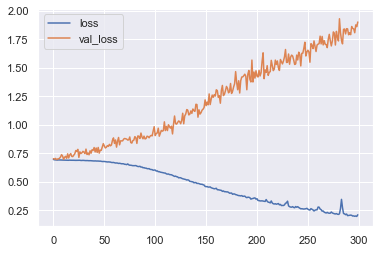

In [66]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

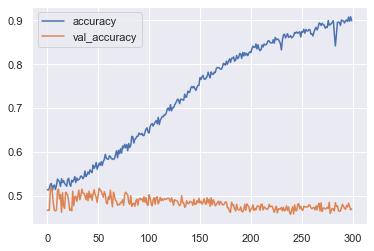

In [67]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
# 50% of predictions correct whether stock price will increase or decrease, preforms no better than random guessing